# NASDAQ All-Stars

In this activity, you’ll calculate and visualize cumulative returns data for the of the NASDAQ index most famous and best performing stocks: Apple, Amazon and Google.

Instructions:

1. Import the required libraries and dependencies.

2. Use the `read_csv` function and the `Path` module to read `AAPL_stock_data.csv`, `AMZN_stock_data.csv`, `GOOG_stock_data.csv` file into Pandas DataFrames. Be sure to set the `DatetimeIndex`. Confirm that Pandas correctly imported the DataFrames by using both the `head` and the `tail` function.

3. Generate the summary statistics for the DataFrames by using the `describe` function.

4. Use `pct_change` to calculate the daily returns for each stock.

5. Use the Pandas default `plot` function to visualize the daily returns for each stock.

6. Use `cumprod` to calculate the cumulative returns for each stock. Use the `tail` function to display the resulting DataFrame. You can then observe the final cumulative return figure.

    > **Hint** Remember the syntax for the `cumprod` function:
    >
    > `cumulative_returns = (1 + daily_returns).cumprod()`

7. Create three plots to visualize the cumulative returns for each stock: AAPL, AMZN, and GOOG.

8. Review the code that’s associated with the cell in the starter code that plots all three visualizations in one graph. Run the cell to display the resulting plot.

    > **Rewind** The first plot, which visualizes the cumulative return for Apple, is set equal to a variable named `ax`. This first plot establishes the parameters `figsize` and `title`, as shown in the following code:
    >
    > `ax = aapl_cumulative_returns.plot(figsize=(20,10), title="Cumulative Returns of Apple, Amazon and Google 2017-2019")`
    >
    > The subsequent plots use the parameters of the first plot. In order to identify the three plots, call the `legend` function on the `ax` variable. Include a list with the description of each DataFrame, in the order in which the DataFrames were plotted.

9. Review the cumulative return plots. Which stock performed the best over the period? Which stock was the most volatile? Based on the current trends, decide which stock you want to invest in.

Extension

Determine what your $10,000 investment would have returned at the end of the period if you had invested in the best-performing stock at the beginning of the period.


References:

[Pandas loc function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html)

[Pandas describe function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)

[Pandas plot function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html)

[Pandas cumprod function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.cumprod.html)

## Step 1: Import the required libraries and dependencies.

In [1]:
# Import the Pandas library.
import pandas as pd

# Import the Path module from the Pathlib library.
from pathlib import Path

# Import the %matplotlib inline dependency.
%matplotlib inline

## Step 2: Use the `read_csv` function and the `Path` module to read `AAPL_stock_data.csv`, `AMZN_stock_data.csv`, `GOOG_stock_data.csv` file into Pandas DataFrames. Be sure to set the `DatetimeIndex`. Confirm that Pandas correctly imported the DataFrames by using both the `head` and the `tail` function.

In [2]:
# Using the read_csv function and the Path module, read in the "AAPL_stock_data.csv" file from the Resources folder
# Set the "Date" as the index column 
# Be sure to set the DatetimeIndex using the parse_dates and infer_datetime_format parameters.
aapl_df = pd.read_csv(
    Path('../Resources/AAPL_stock_data.csv'),
    index_col='Date', 
    parse_dates=True, 
    infer_datetime_format=True
)


# Review the AAPL DataFrame with both the 'head' & 'tail' functions.
display(aapl_df.head())
display(aapl_df.tail())

,Close
Date,
2017-01-03,116.15
2017-01-04,116.02
2017-01-05,116.61
2017-01-06,117.91
2017-01-09,118.99


,Close
Date,
2019-12-24,284.27
2019-12-26,289.91
2019-12-27,289.80
2019-12-30,291.52
2019-12-31,293.65


In [3]:
# Using the read_csv function and the Path module, read in the "AMZN_stock_data.csv" file from the Resources folder
# Set the "Date" as the index column
# Be sure to set the DatetimeIndex using the parse_dates and infer_datetime_format parameters
amzn_df = pd.read_csv(
    Path('../Resources/AMZN_stock_data.csv'), 
    index_col='Date', 
    parse_dates=True, 
    infer_datetime_format=True
)

# Review the AMZN DataFrame with both the 'head' & 'tail' functions.
display(amzn_df.head())
display(amzn_df.tail())

,Close
Date,
2017-01-03,753.67
2017-01-04,757.18
2017-01-05,780.45
2017-01-06,795.99
2017-01-09,796.92


,Close
Date,
2019-12-24,1789.21
2019-12-26,1868.77
2019-12-27,1869.80
2019-12-30,1846.89
2019-12-31,1847.84


In [4]:
# Using the read_csv function and the Path module, read in the "GOOG_stock_data.csv" file from the Resources folder
# Set the "Date" as the index column
# Be sure to set the DatetimeIndex using the parse_dates and infer_datetime_format parameters
goog_df = pd.read_csv(
    Path('../Resources/GOOG_stock_data.csv'), 
    index_col='Date', 
    parse_dates=True, 
    infer_datetime_format=True
)

# Review the GOOG DataFrame with both the 'head' & 'tail' functions
display(goog_df.head())
display(goog_df.tail())

,Close
Date,
2017-01-03,786.14
2017-01-04,786.90
2017-01-05,794.02
2017-01-06,806.15
2017-01-09,806.65


,Close
Date,
2019-12-24,1343.56
2019-12-26,1360.40
2019-12-27,1351.89
2019-12-30,1336.14
2019-12-31,1337.02


## Step 3: Generate the summary statistics for the DataFrames by using the `describe` function.

In [5]:
# Use the Pandas describe function to generate summary statistics for the AAPL DataFrame
aapl_df.describe()

,Close
count,754.000000
mean,182.653926
std,34.437846
min,116.020000
25%,156.395000
50%,175.865000
75%,203.980000
max,293.650000


In [6]:
# Use the Pandas describe function to generate summary statistics for the AMZN DataFrame
amzn_df.describe()

,Close
count,754.000000
mean,1466.790199
std,384.675788
min,753.670000
25%,1003.185000
50%,1605.510000
75%,1787.742500
max,2039.510000


In [7]:
# Use the Pandas describe function to generate summary statistics for the GOOG DataFrame
goog_df.describe()

,Close
count,754.000000
mean,1074.617639
std,135.383321
min,786.140000
25%,973.022500
50%,1085.170000
75%,1173.857500
max,1361.170000


## Step 4: Use `pct_change` to calculate the daily returns for each stock.

In [8]:
# Using the Pandas pct_change function in conjunction with the dropna function, generate AAPL's daily returns DataFrame
aapl_daily_returns = aapl_df.pct_change().dropna()

# Review the first 5 rows of the resulting AAPL daily returns DataFrame
aapl_daily_returns.head()

,Close
Date,
2017-01-04,-0.001119
2017-01-05,0.005085
2017-01-06,0.011148
2017-01-09,0.009160
2017-01-10,0.001008


In [9]:
# Using the Pandas pct_change function in conjunction with the dropna function, generate AMZN's daily returns DataFrame
amzn_daily_returns = amzn_df.pct_change().dropna()

# Review the first 5 rows of the resulting AMZN daily returns DataFrame
amzn_daily_returns.head()

,Close
Date,
2017-01-04,0.004657
2017-01-05,0.030732
2017-01-06,0.019912
2017-01-09,0.001168
2017-01-10,-0.001280


In [10]:
# Using the Pandas pct_change function in conjunction with the dropna function, generate GOOG's daily returns DataFrame
goog_daily_returns = goog_df.pct_change().dropna()

# Review the first 5 rows of the resulting GOOG daily returns DataFrame
goog_daily_returns.head()

,Close
Date,
2017-01-04,0.000967
2017-01-05,0.009048
2017-01-06,0.015277
2017-01-09,0.000620
2017-01-10,-0.002306


## Step 5: Use the Pandas default `plot` function to visualize the daily returns for each stock.

<AxesSubplot:title={'center':'Apple Daily Returns 2017-2019'}, xlabel='Date'>

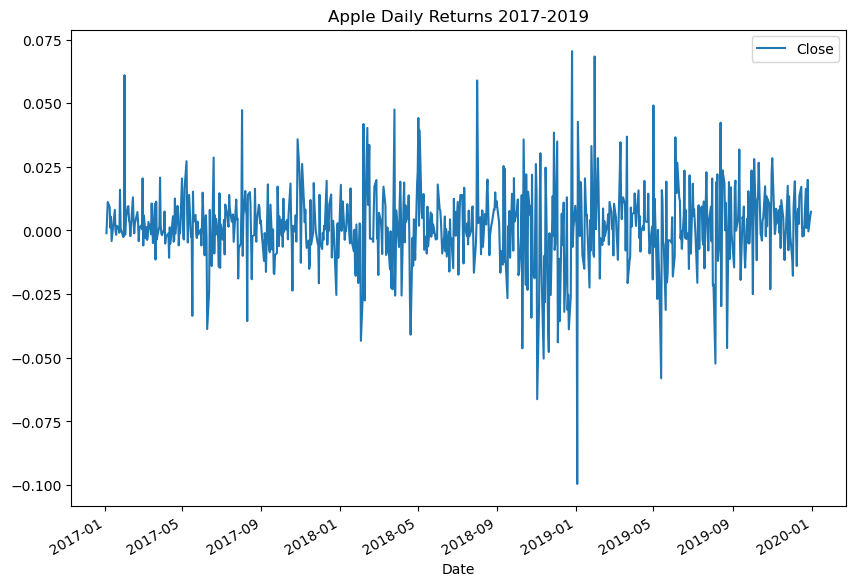

In [11]:
# Use the Pandas plot function to plot the daily return data for AAPL
# Adjust the figsize and be sure to include a plot title
aapl_daily_returns.plot(figsize=(10,7), title="Apple Daily Returns 2017-2019")

<AxesSubplot:title={'center':'Amazon Daily Returns 2017-2019'}, xlabel='Date'>

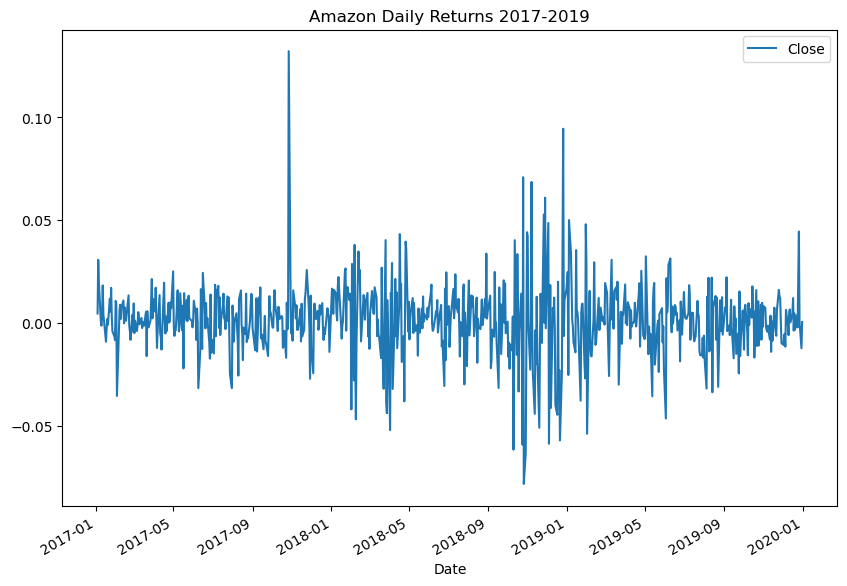

In [12]:
# Use the Pandas plot function to plot the daily return data for AMZN
# Adjust the figsize and be sure to include a plot title
amzn_daily_returns.plot(figsize=(10,7), title="Amazon Daily Returns 2017-2019")

<AxesSubplot:title={'center':'Google Daily Returns 2017-2019'}, xlabel='Date'>

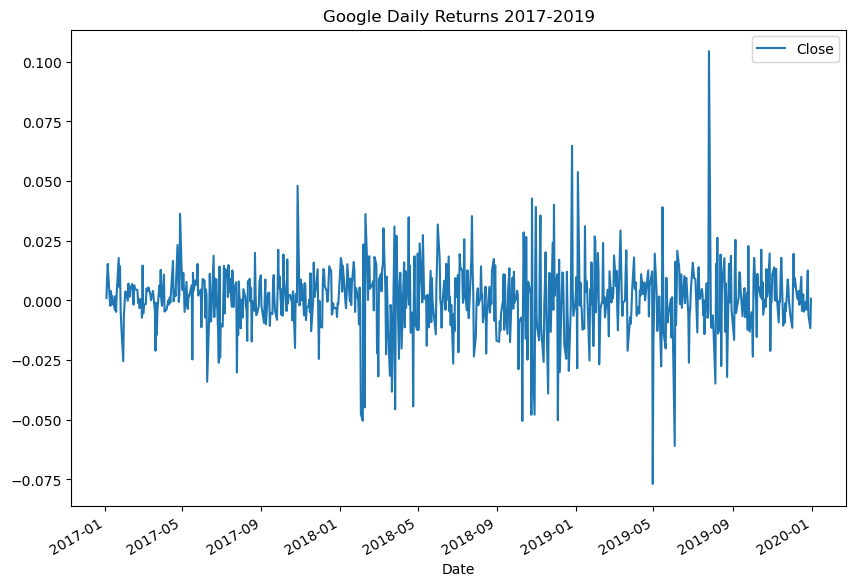

In [13]:
# Use the Pandas plot function to plot the daily return data for GOOG
# Adjust the figsize and be sure to include a plot title
goog_daily_returns.plot(figsize=(10,7), title="Google Daily Returns 2017-2019")

## Step 6: Use `cumprod` to calculate the cumulative returns for each stock. Use the `tail` function to display the resulting DataFrame. You can then observe the final cumulative return figure.

Using the Pandas `cumprod` function, the equation for genarating the cumulative daily returns DataFrame is as follows:

cumulative_returns_df = (1 + daily_returns_df).cumprod()

In [14]:
# Use the Pandas cumprod function and the cumulative returns equation to generate the cumulative daily returns DataFrame for AAPL
aapl_cumulative_returns = (1 + aapl_daily_returns).cumprod()

# Revew the last 5 rows of AAPL's cumulative daily returns DataFrame
aapl_cumulative_returns.tail()

,Close
Date,
2019-12-24,2.447439
2019-12-26,2.495997
2019-12-27,2.495050
2019-12-30,2.509858
2019-12-31,2.528196


In [15]:
# Use the Pandas cumprod function and the cumulative returns equation to generate the cumulative daily returns DataFrame for AMZN
amzn_cumulative_returns = (1 + amzn_daily_returns).cumprod()

# Revew the last 5 rows of AMZN's cumulative daily returns DataFrame
amzn_cumulative_returns.tail()

,Close
Date,
2019-12-24,2.373997
2019-12-26,2.479560
2019-12-27,2.480927
2019-12-30,2.450529
2019-12-31,2.451789


In [16]:
# Use the Pandas cumprod function and the cumulative returns equation to generate the cumulative daily returns DataFrame for GOOG
goog_cumulative_returns = (1 + goog_daily_returns).cumprod()

# Revew the last 5 rows of GOOG's cumulative daily returns DataFrame
goog_cumulative_returns.tail()

,Close
Date,
2019-12-24,1.709059
2019-12-26,1.730481
2019-12-27,1.719656
2019-12-30,1.699621
2019-12-31,1.700740


## Step 7: Create three plots to visualize the cumulative returns for each stock: AAPL, AMZN, and GOOG.

<AxesSubplot:title={'center':'Apple Cumulative Returns 2017-2019'}, xlabel='Date'>

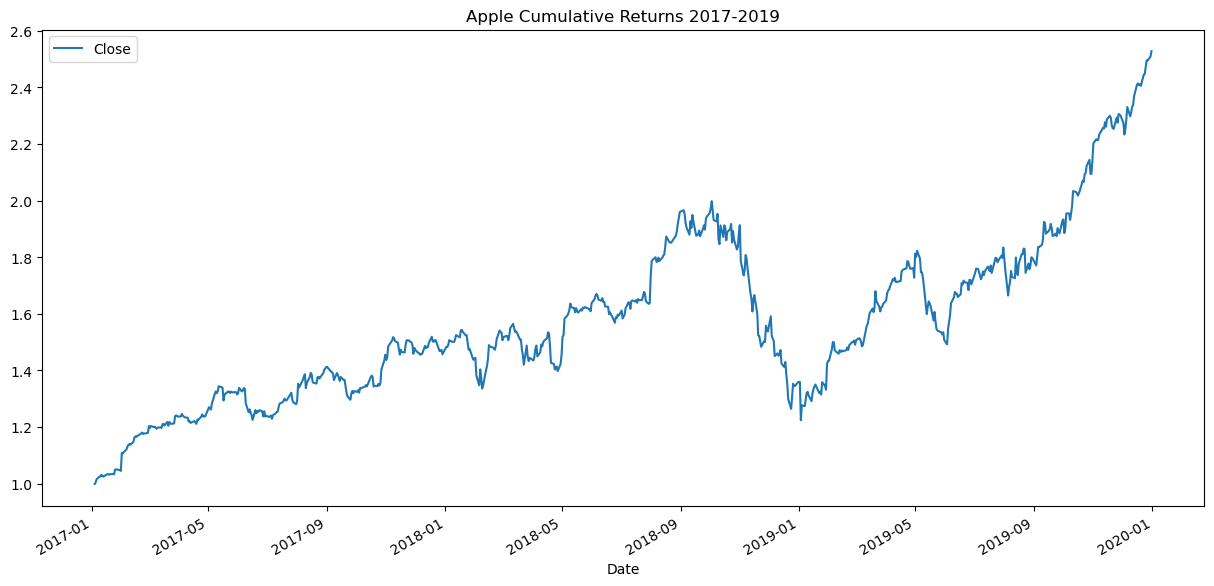

In [17]:
# Using the Pandas plot function, visualize the the cumulative return DataFrame for AAPL
# Be sure to adjust the figure size and add a title 
aapl_cumulative_returns.plot(figsize=(15,7), title="Apple Cumulative Returns 2017-2019")

<AxesSubplot:title={'center':'Amazon Cumulative Returns 2017-2019'}, xlabel='Date'>

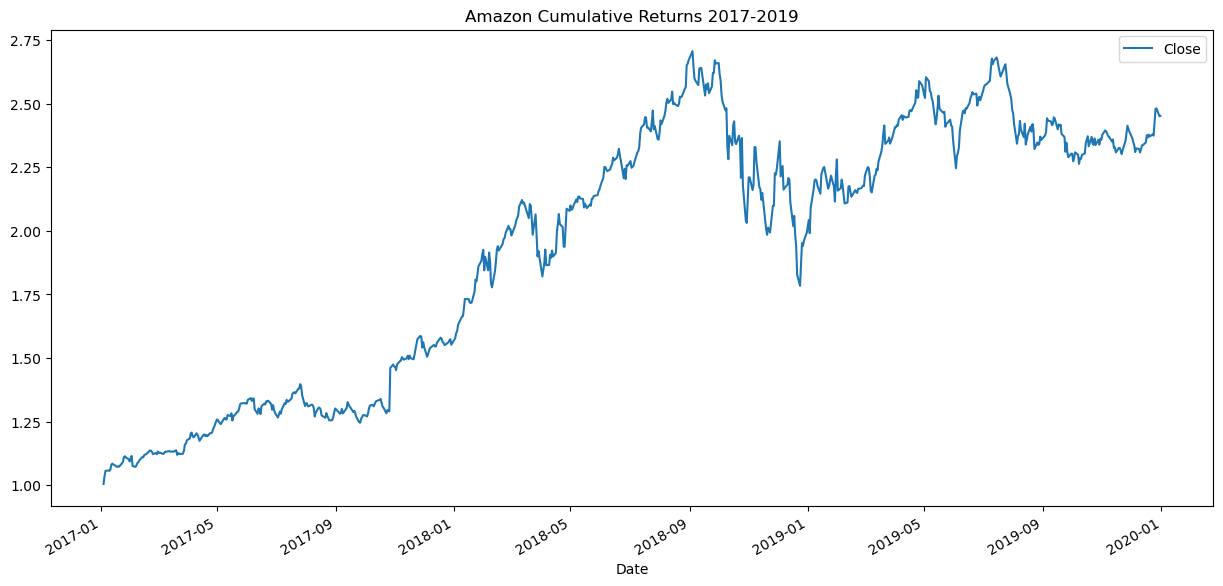

In [18]:
# Using the Pandas default plot function, visualize the the cumulative return DataFrame for AMZN
# Be sure to adjust the figure size and add a title
amzn_cumulative_returns.plot(figsize=(15,7), title="Amazon Cumulative Returns 2017-2019")

<AxesSubplot:title={'center':'Google Cumulative Returns 2017-2019'}, xlabel='Date'>

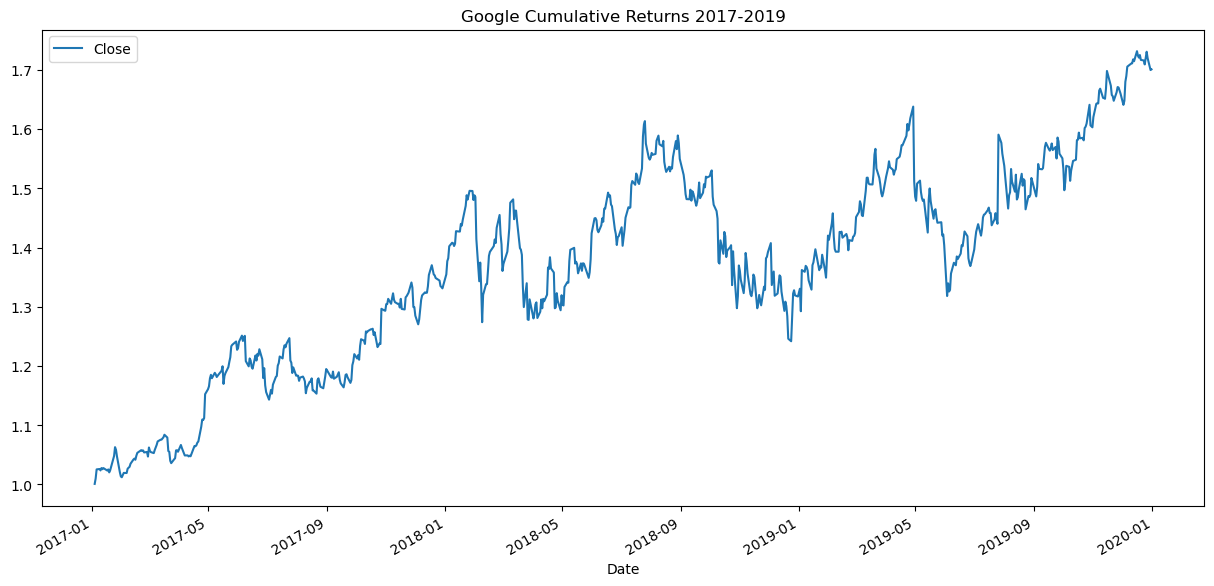

In [19]:
# Using the Pandas default plot function, visualize the the cumulative return DataFrame for GOOG
# Be sure to adjust the figure size and add a title
goog_cumulative_returns.plot(figsize=(15,7), title="Google Cumulative Returns 2017-2019")

## Step 8: Review the code that’s associated with the cell in the starter code that plots all three visualizations in one graph. Run the cell to display the resulting plot.

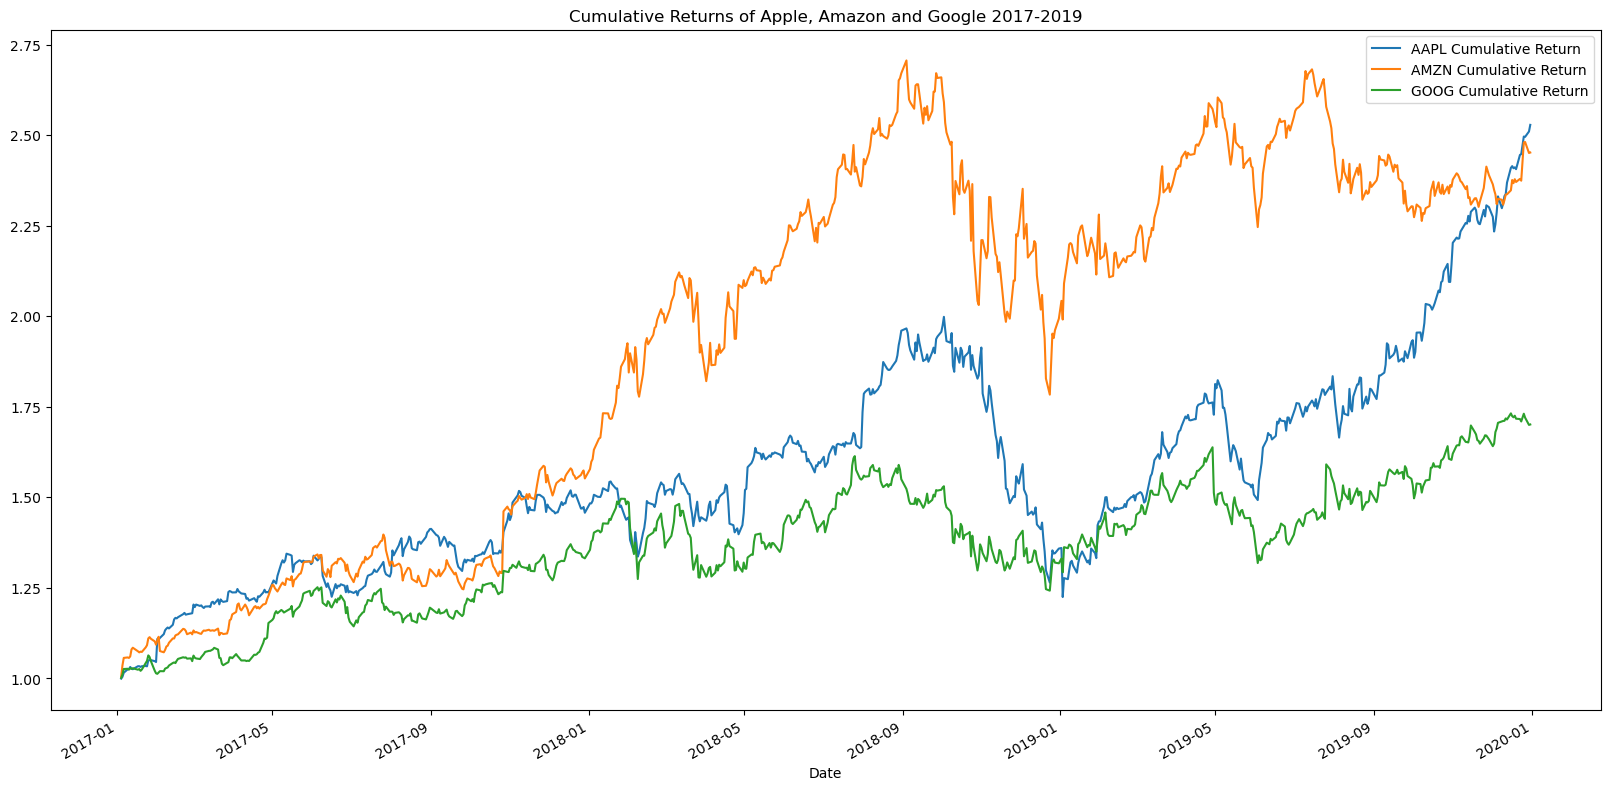

In [20]:
# A visualization that includes all 3 of the cumulative return plots.
# the variable 'ax' is assigned to the first plot, in the case AAPL, in order to set the size and title for the visualization. 
# The 'ax' variable is then assigned as a parameter and value inside the plot function for the AMZN and GOOG plots. 
# The 'ax' variable is also used in conjunction with the 'legend' function to label each of the plots in order of appearance.
# Be sure to run this cell!

ax = aapl_cumulative_returns.plot(figsize=(20,10), title="Cumulative Returns of Apple, Amazon and Google 2017-2019")
amzn_cumulative_returns.plot(ax=ax)
goog_cumulative_returns.plot(ax=ax)


ax.legend(['AAPL Cumulative Return',
          'AMZN Cumulative Return', 
          'GOOG Cumulative Return'])



## Step 9: Review the cumulative return plots. Which stock performed the best over the period? Which stock was the most volatile? Based on the current trends, decide which stock you want to invest in.

**Question 1:** Based on the cumulative return plots, which stock performed best over the time period?

**Answer 1:** Based on the cumulative return information, AAPL just managed to outperform AMZN with a cumulative return of 252.82% versus 245.18%.


**Question 2:** Based on the cumulative return plots, which stock appeared to be the most volatile over the time period? What Pandas function might be used to validate that information. 

**Answer 2:** Given the visualization AMZN appears to be the most volatile stock. This could be validated by generating the summary statistics of the daily return infomation and comparing standard deviation. In fact, AMZN does have the highest standard deviation at 0.0173.


In [21]:
display(aapl_daily_returns.describe())
display(amzn_daily_returns.describe())
display(goog_daily_returns.describe())

,Close
count,753.000000
mean,0.001354
std,0.015566
min,-0.099607
25%,-0.005289
50%,0.001177
75%,0.009333
max,0.070422


,Close
count,753.000000
mean,0.001341
std,0.017310
min,-0.078197
25%,-0.006139
50%,0.001434
75%,0.009803
max,0.132164


,Close
count,753.000000
mean,0.000812
std,0.014594
min,-0.076966
25%,-0.005474
50%,0.000934
75%,0.008405
max,0.104485


**Question 3:** Based on the informtion, which stock are you mist likely to invest in?
    
**Answer 3:** I would most likely invest in AAPL. It is slightly less volatile than AMZN and on a good run. 

## Extension: Determine what your $10,000 investment would have returned at the end of the period if you had invested in the best-performing stock at the beginning of the period.

In [22]:
# Calculate the return value of a $10000 investment made at the start of the period on the best performing stock.  
# Hint: Use the Pandas loc funcion and an index value to access the final cumulative return value of the best performing stock.
# Hint: The formula to calculate the return value is: inital investment * cumulative return

initial_investment = 10000

aapl_ending_value = initial_investment * (aapl_cumulative_returns.loc['2019-12-31'])[0]
print(f"A $10,000 investment in the best performing stock at the start of 2017 would have returned ${aapl_ending_value: .2f}.")

A $10,000 investment in the best performing stock at the start of 2017 would have returned $ 25281.96.
